In [1]:
# read data file.pkl from dataset_merge folder
import os
import pandas as pd

# save path
save_path = os.path.join(os.getcwd(), 'dataset_merge')
# read the merged dataset
merged_df = pd.read_pickle(os.path.join(save_path, 'dataset_merge.pkl'))

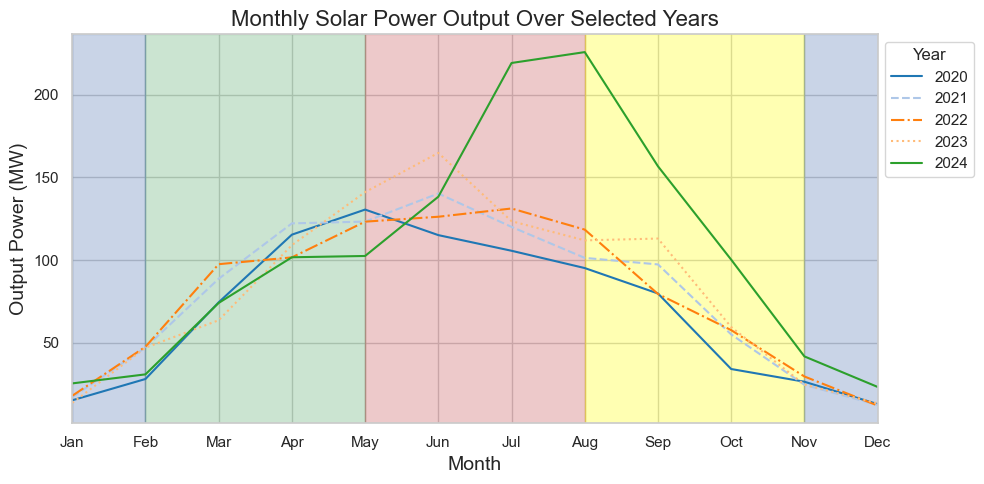

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the range of years to plot
selected_years = list(range(2020, 2025))

month = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create a pivot table with years as columns and months as rows
merged_df['Year'] = merged_df['DateTime'].dt.year
merged_df['Month'] = merged_df['DateTime'].dt.month
pivot_data = merged_df.pivot_table(index='Month', columns='Year', values='Real_Time_Measurement_MW', aggfunc='mean')

# Filter the pivot_data to include only the selected years
filtered_data = pivot_data[selected_years]

# Define line styles
line_styles = ['-', '--', '-.', ':']

# Step 3: Plot the data
plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")

# Use a predefined color palette from seaborn
palette = sns.color_palette("tab20", len(filtered_data.columns))

# Loop through each year and plot the monthly data with different line styles
for i, (year, style) in enumerate(zip(filtered_data.columns, line_styles * (len(filtered_data.columns) // len(line_styles) + 1))):
    plt.plot(filtered_data.index, filtered_data[year], label=str(year), color=palette[i], linestyle=style)

# Customize the plot
plt.title("Monthly Solar Power Output Over Selected Years", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Output Power (MW)", fontsize=14)
plt.xticks(ticks=range(1, 13), labels=month)
plt.xticks(ticks=range(1, 13), labels=month, horizontalalignment='center')
plt.xlim(1, 12)
plt.legend(title="Year", loc="upper left", bbox_to_anchor=(1, 1))

# Add background color for each season
plt.axvspan(2, 5, color='g', alpha=0.3, label='Spring')
plt.axvspan(5, 8, color='r', alpha=0.3, label='Summer')
plt.axvspan(8, 11, color='yellow', alpha=0.3, label='Autumn')
plt.axvspan(1, 2, color='b', alpha=0.3, label='Winter')
plt.axvspan(11, 12, color='b', alpha=0.3)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()